In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pns
import math as mt
import scipy.stats as sps


def GetFrequencyTable(data,Bins):
    frequency,intervals = np.histogram(data,Bins)

    FreqTab = pns.DataFrame()
    FreqTab["frequency"]=frequency
    FreqTab["Start"]=intervals[:len(intervals)-1]
    FreqTab["End"] = intervals[1:]
    #intervals = pns.Series(intervals).diff().dropna()
    FreqTab.sort_values("frequency",ascending=False)
    FreqTab["Procent"]=FreqTab["frequency"]/FreqTab["frequency"].sum()*100

    #FreqTab = FreqTab[FreqTab["frequency"]!=0]
    return FreqTab

In [2]:
#%run "C:\data\MyFunct.ipynb"

def PlotHist(data,BinsCount):
    plt.hist(data,bins=BinsCount,density=True)
    plt.scatter(data,np.zeros(len(data)),color = 'yellow',label = "данные",s=8)

def PlotPDF(data,distrib):
    grid = np.linspace(min(data), max(data),200) 
    plt.plot(grid,distrib.pdf(grid),color='red',label = "Эталон")


In [21]:
N = 500

Dist = sps.norm(10,5)
#Dist = sps.uniform(5,10)



16


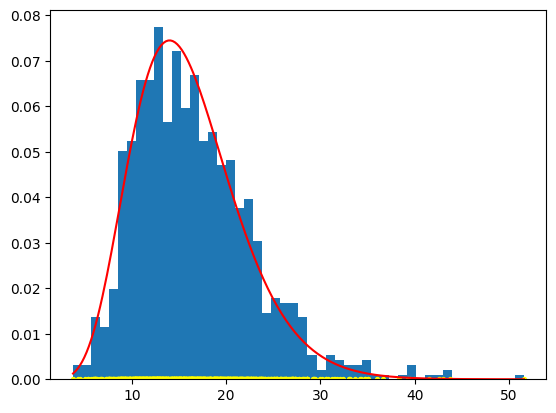

In [23]:
M = 1000
v=0
stat = np.zeros(M)
for k in range(M): 
    dataTest = sps.norm(10,5).rvs(size=N) #Тестовая выборка для проверки критерия

    FreqTab = GetFrequencyTable(dataTest,20)
    FreqTab['Etalon']=0.00

    Res = pns.DataFrame()
    Res['frequency']=0.0
    Res['Etalon']=0.0

    t=0.0 
    f = 0.0

    for i in range(len(FreqTab)):  
        IEnd = FreqTab['End'][i]
        IStart = FreqTab['Start'][i]
        TheorFreq = (Dist.cdf(IEnd)-Dist.cdf(IStart))*N
        t+=TheorFreq 
        f+=FreqTab['frequency'][i] 
        if (t>5):
            rows = pns.DataFrame({'frequency':[f],'Etalon':[t]})
            Res=pns.concat([Res,rows],ignore_index=True)
            t=0.0
            f=0.0
    if (t!=0):
        rows = pns.DataFrame({'frequency':[f],'Etalon':[t]})
        Res=pns.concat([Res,rows],ignore_index=True)


    FreqTab = Res

    
    st ,pvalue = sps.chisquare(FreqTab['frequency'],FreqTab['Etalon'],sum_check=False)
    v = v+ FreqTab.shape[0]

    stat[k]=st
    #print('Pvalue',pvalue, st)
    #if (pvalue<0.05):
    #    plt.figure()
    #    plt.hist(dataTest)


#pvalue = sps.normaltest(dataTest)
print(int(v/M))
df=int(v/M) 
distr = sps.chi2(df)

plt.figure()
PlotHist(stat,50)
PlotPDF(stat,distr)
plt.show()

0.0


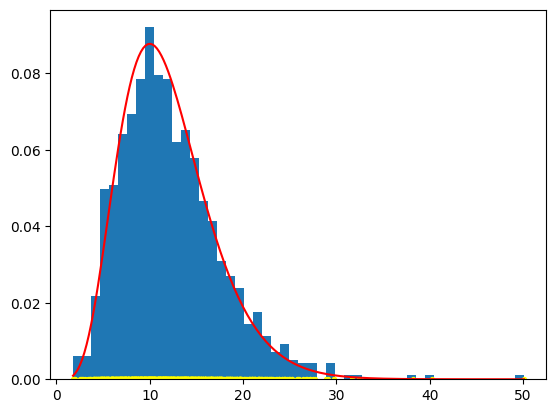

In [25]:
df=12
distr = sps.chi2(df)

plt.figure()
PlotHist(stat,50)
PlotPDF(stat,distr)

print(distr.cdf(-1))